In [226]:
dfCrime = read.csv("crime_v2.csv")

In [227]:
summary(dfCrime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [228]:
unique(dfCrime$prbconv)

[1] 0.527595997 1.481480002 0.267856985 0.525424004 0.476563007 0.068376102
 [7] 0.520606995 0.769231021 0.436441004 1.225610018 0.334701002 0.403780013
[13] 0.406780005 0.352941006 0.515464008 0.325300992 0.385495991 0.972972989
[19] 0.452829987 0.450567007 0.763333023 0.371879011 0.259833008 0.140350997
[25] 0.207830995 0.736908972 0.62251699  0.493438005 0.459215999 0.154451996
[31] 0.248275995 0.739394009 0.229589999 0.528302014 0.308411002 0.203724995
[37] 0.457210004 0.549019992 0.548494995 0.386925995 0.589905024 0.573943973
[43] 0.595077991 1.234380007 0.571429014 0.384236008 0.364353001 0.781608999
[49] 0.522387981 0.220339    1.5         0.793232977 0.347799987 0.226361006
[55] 0.438960999 1.358139992 0.393413007 0.495575011 0.271946996 0.477732986
[61] 1.068969965 0.28947401  0.412698001 0.314606994 0.340490997 0.426777989
[67] 1.015380025 0.36015299  0.520709991 0.559822977 0.443681002 0.492940009
[73] 0.50819701  0.401198    0.468531013 0.322580993 0.722972989 0.909090996
[79] 0.327868998 0.410596013 0.328664005 0.343023002 0.381908    2.121210098
[85] 0.443114012 0.300577998 0.449999988 0.588859022 1.670519948 1.182929993
[91]             `          
92 Levels:  ` 0.068376102 0.140350997 0.154451996 0.203724995 ... 2.121210098

In [229]:
library(survey)
library(effsize)
library(dplyr)
library(ggplot2)
library(tableone)

In [230]:
dfCrime <-na.omit(dfCrime)

In [231]:
dfCrime <- dfCrime[!duplicated(dfCrime),]

In [232]:
dfCrime$prbconv<-as.numeric(levels(dfCrime$prbconv))[dfCrime$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [233]:
dfCrime$county<-as.factor(dfCrime$county)

In [272]:
#Create a survey design from our data
crime_design = svydesign(ids = ~1, id=dfCrime$county, data=dfCrime)

#Include the relevent questions in our design object for analysis preparation
crime_design <- 
    update( 
        crime_design ,     
        one = 1,
        georegionid = case_when (
            (central ==0 & west ==0) ~ 0, #Eastern, Coastal, Other
            (central ==0 & west ==1) ~ 1, #Western
            (central ==1 & west ==0) ~ 2, #Central
            (central ==1 & west ==1) ~ 3, #Central-Western Boarder County(ies)
        ),
        georegion =
            factor( georegionid , levels = 0:3 , labels =
                    c( 'Region 1',
                       'Region 2',
                       'Region 3',
                       'Region 4'
                      )
                   ),
        urban =
            factor( urban , levels = 0:1 , labels =
                    c( 'Non-Urban',
                       'Urban'
                      )
                   ),
        crimes = crmrte * 
)

Warning message in svydesign.default(ids = ~1, id = dfCrime$county, data = dfCrime):
“No weights or probabilities supplied, assuming equal probability”

In [273]:
summary(crime_design)
str(crime_design)

Independent Sampling design (with replacement)
update(crime_design, one = 1, georegionid = case_when((central == 
    0 & west == 0) ~ 0, (central == 0 & west == 1) ~ 1, (central == 
    1 & west == 0) ~ 2, (central == 1 & west == 1) ~ 3, ), georegion = factor(georegionid, 
    levels = 0:3, labels = c("Region 1", "Region 2", "Region 3", 
        "Region 4")), urban = factor(urban, levels = 0:1, labels = c("Non-Urban", 
    "Urban")))
Probabilities:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 
Data variables:
 [1] "county"      "year"        "crmrte"      "prbarr"      "prbconv"    
 [6] "prbpris"     "avgsen"      "polpc"       "density"     "taxpc"      
[11] "west"        "central"     "urban"       "pctmin80"    "wcon"       
[16] "wtuc"        "wtrd"        "wfir"        "wser"        "wmfg"       
[21] "wfed"        "wsta"        "wloc"        "mix"         "pctymle"    
[26] "one"         "georegionid" "georegion"  

List of 9
 $ cluster   :'data.frame':	90 obs. of  1 variable:
  ..$ id: int [1:90] 1 2 3 4 5 6 7 8 9 10 ...
 $ strata    :'data.frame':	90 obs. of  1 variable:
  ..$ V1: num [1:90] 1 1 1 1 1 1 1 1 1 1 ...
 $ has.strata: logi FALSE
 $ prob      : num [1:90] 1 1 1 1 1 1 1 1 1 1 ...
 $ allprob   :'data.frame':	90 obs. of  1 variable:
  ..$ probs: num [1:90] 1 1 1 1 1 1 1 1 1 1 ...
 $ call      : language update(crime_design, one = 1, georegionid = case_when((central == 0 & west ==      0) ~ 0, (central == 0 & west =| __truncated__ ...
 $ variables :'data.frame':	90 obs. of  28 variables:
  ..$ county     : Factor w/ 90 levels "1","3","5","7",..: 1 2 3 4 5 6 7 8 9 10 ...
  ..$ year       : int [1:90] 87 87 87 87 87 87 87 87 87 87 ...
  ..$ crmrte     : num [1:90] 0.0356 0.0153 0.013 0.0268 0.0106 ...
  ..$ prbarr     : num [1:90] 0.298 0.132 0.444 0.365 0.518 ...
  ..$ prbconv    : num [1:90] 0.528 1.481 0.268 0.525 0.477 ...
  ..$ prbpris    : num [1:90] 0.436 0.45 0.6 0.435 0.443 ...
  .

In [274]:
length(dfCrime$county)

[1] 90

In [275]:
crimeStats<-svyby(~crmrte+year+prbarr+prbconv+prbpris+avgsen+polpc+density+taxpc+west+central+urban+pctmin80+wcon+wtuc+wtrd+wfir+wser+wmfg+wfed+wsta+wloc+mix+pctymle, ~county, design=crime_design, svytotal, keep.names=FALSE)

In [276]:
crimeStats

county,crmrte,year,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,se.wtuc,se.wtrd,se.wfir,se.wser,se.wmfg,se.wfed,se.wsta,se.wloc,se.mix,se.pctymle
1,0.0356036,87,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,0.0152532,87,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,0.0129603,87,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,0.0267532,87,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,0.0106232,87,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,0.0146067,87,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920
13,0.0296409,87,0.365004,0.5206070,0.420833,10.55,0.00133771,0.5169492,30.69649,⋯,366.3004,205.5358,310.1737,259.3391,303.42,449.84,350.72,283.76,0.15237226,0.07073344
15,0.0202814,87,0.392111,0.7692310,0.507692,10.64,0.00103525,0.3009986,34.00304,⋯,353.2182,199.2377,356.1254,206.2816,235.05,416.49,370.62,297.13,0.23495702,0.07430546
17,0.0304289,87,0.251599,0.4364410,0.436893,7.32,0.00129761,0.3503982,34.96204,⋯,346.6011,202.9595,268.3363,208.2520,339.76,389.51,322.06,278.39,0.21818182,0.07769163
19,0.0221567,87,0.162860,1.2256100,0.333333,10.34,0.00202425,0.5767442,61.15251,⋯,613.2261,191.2452,290.5141,266.0934,567.06,403.15,258.33,299.44,0.05334728,0.07713232


In [296]:
df<-svyby(~crmrte, ~density+georegion+urban, design=crime_design, svytotal ) %>% as.data.frame()

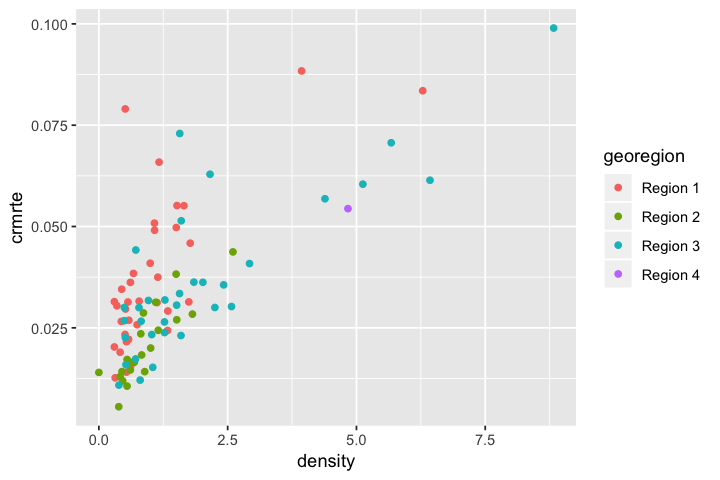

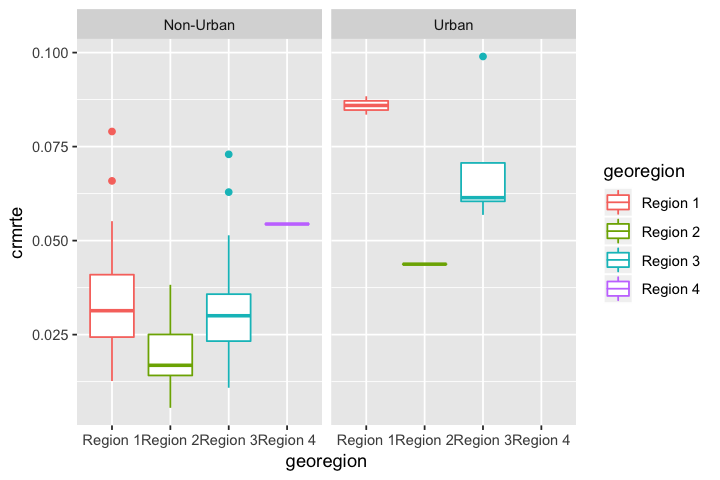

In [310]:
ggplot(data = df, aes(x = density, y = crmrte, color = georegion)) +
  geom_point()

# Boxplot of weight vs. weeks
ggplot(data = df, 
       aes(x = georegion, y = crmrte, color=georegion)) +
  geom_boxplot() + facet_wrap(~ urban)


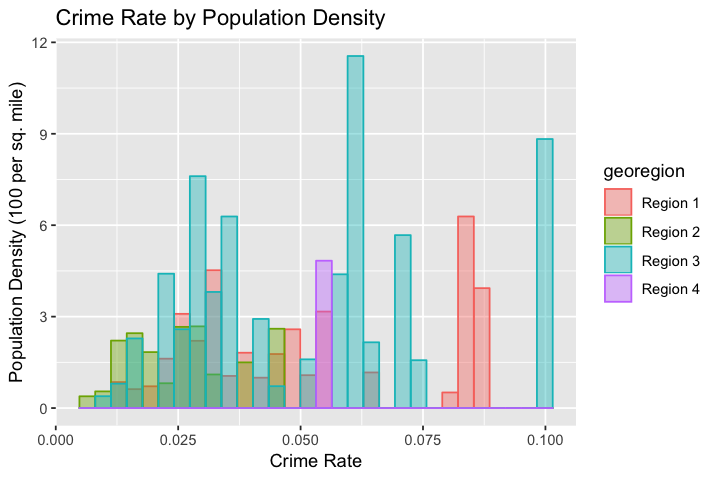

In [314]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(df, aes( x=crmrte, weight=density, color=georegion, fill = georegion)) + 
  geom_histogram(position="identity", bins=30, alpha=0.4) +
  labs(title="Crime Rate by Population Density", x="Crime Rate", y="Population Density (100 per sq. mile)")

In [25]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


corrplot 0.84 loaded
Warning message in cor(A, use = "complete.obs"):
“the standard deviation is zero”

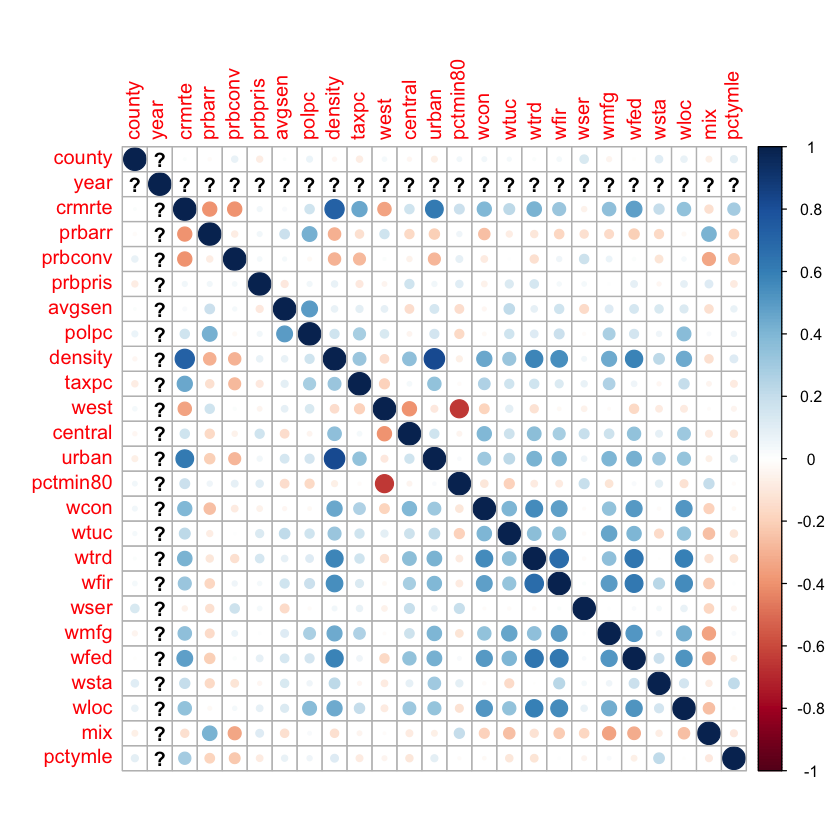

In [28]:
library(corrplot)
A$prbconv <- as.numeric(A$prbconv)
x <- cor(A, use = "complete.obs")
corrplot(x, method='circle')

In [32]:
install.packages("DataExplorer")

also installing the dependency ‘networkD3’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(DataExplorer)

In [5]:
config <- list(
  "introduce" = list(),
  "plot_str" = list(
    "type" = "diagonal",
    "fontSize" = 35,
    "width" = 1000,
    "margin" = list("left" = 350, "right" = 250)
  ),
  "plot_missing" = list(),
  "plot_histogram" = list(),
  "plot_qq" = list(sampled_rows = 1000L),
  "plot_bar" = list(),
  "plot_correlation" = list("cor_args" = list("use" = "pairwise.complete.obs")),
#  "plot_prcomp" = list(),
  "plot_boxplot" = list(),
  "plot_scatterplot" = list(sampled_rows = 1000L)
)

In [7]:
create_report(dfCrime, config=config)



processing file: report.rmd


  |..                                                               |   2%
   inline R code fragments

  |...                                                              |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                            |   7%
  ordinary text without R code

  |......                                                           |  10%
label: introduce
  |........                                                         |  12%
  ordinary text without R code

  |.........                                                        |  14%
label: plot_intro
  |...........                                                      |  17%
  ordinary text without R code

  |............                                                     |  19%
label: data_structure
  |..............                                                   |  21%
  ordinary text without R code

  |...............                      

output file: /Users/kevin/Documents/GitHub/MIDS/W203/Week12/lab_3_pt1/report.knit.md



/Users/kevin/anaconda3/bin/pandoc +RTS -K512m -RTS /Users/kevin/Documents/GitHub/MIDS/W203/Week12/lab_3_pt1/report.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash --output /Users/kevin/Documents/GitHub/MIDS/W203/Week12/lab_3_pt1/report.html --smart --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template /Users/kevin/anaconda3/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:yeti' --include-in-header /var/folders/q8/4bswy_qj0156rc11h3f8q2dm0000gn/T//RtmpTxYaYh/rmarkdown-str16cb665cb4bd9.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: report.html


Report is generated at "/Users/kevin/Documents/GitHub/MIDS/W203/Week12/lab_3_pt1/report.html".
